In [0]:
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
from google.colab import drive
import os
import seaborn as sns

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data Mining/HW4')

%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 100

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

              x0         x1
1      13.513730  45.033556
2      15.075595  55.974410
3      19.713162  50.680964
4      15.931429  50.227550
5      14.874820  47.480738
...          ...        ...
1036   56.594154  16.610712
1037   64.795129  15.395361
1038   60.979660  17.002262
1039   60.774582  15.815247
1040  115.000000  95.000000

[1040 rows x 2 columns]


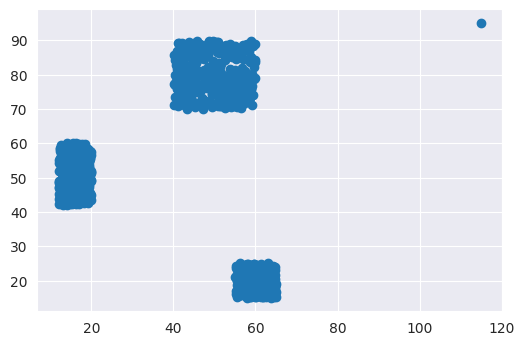

In [3]:
c2 = pd.read_csv("C2.txt", delim_whitespace=True, names=['x0', 'x1'])
print (c2)
plt.scatter(c2['x0'],c2['x1'])

In [0]:
data_set = []
for index, row in c2.iterrows():
        data_set.append([row['x0'], row['x1']]) 
data_set = np.array(data_set)

In [0]:
def init_kmeans_plus_plus(points, K, c_init = None):
    assert K>=2, "So you want to make 1 cluster?"
    # get the first centroid
    if c_init is None:
        centroids = [points[0]]
    # choice next
    for k in range (0, K-1):
        
        prob_distribution = []
        for point in points:
            proba = distance.euclidean(point,centroids[k-1])**2 # compare to last center point
            prob_distribution.append(proba)
            #normalize these values at the end so that we can now use the array as a probability distribution function
        prob_distribution = np.array(prob_distribution)/np.sum(prob_distribution)  
        #Now we will get one of these values and add it to our clusters
        centroids.append(points[np.random.choice(range(points.shape[0]), p=prob_distribution)])      
    return np.array(centroids)

In [12]:
cluster_points = init_kmeans_plus_plus(data_set, 3)
print('Cluster Centeroids:', cluster_points)

cluster_distance = np.full(len(data_set), np.inf)
clusters = [[] for i in range(3)]
for point_idx, point in enumerate(data_set):
    closest_center = 0
    for cluster_idx, cluster_point in enumerate(cluster_points):
        if cluster_distance[point_idx] is math.inf:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
            continue
        if distance.euclidean(point,cluster_point) < cluster_distance[point_idx]:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
            closest_center = cluster_idx
    clusters[closest_center].append(point)            
print('3-center cost:', np.max(cluster_distance))

cost = math.sqrt(np.sum(cluster_distance**2, axis=0) /len(data_set))
print('3-means cost:', cost)

Cluster Centeroids: [[13.51373 45.03356]
 [40.1288  77.14531]
 [63.31265 21.76655]]
3-center cost: 76.9706840358144
3-means cost: 9.70066448653479


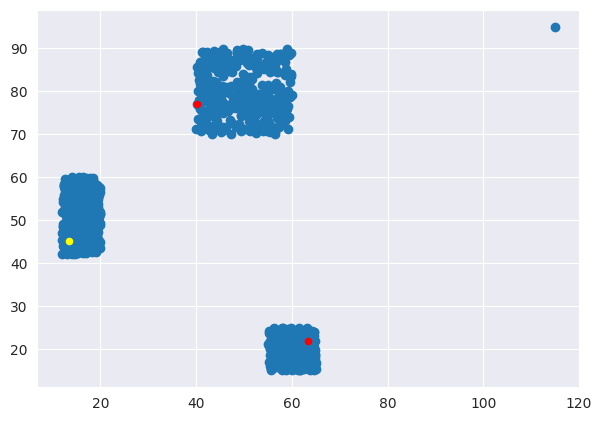

In [13]:
plt.figure(figsize=(7,5), dpi=100)
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        plt.scatter(point[0],point[1], marker='o', c='red', s=20)
    if index is 0: # this is our ifrst point, which was picked staticly
        plt.scatter(point[0],point[1], marker='o', c='yellow', s=20)

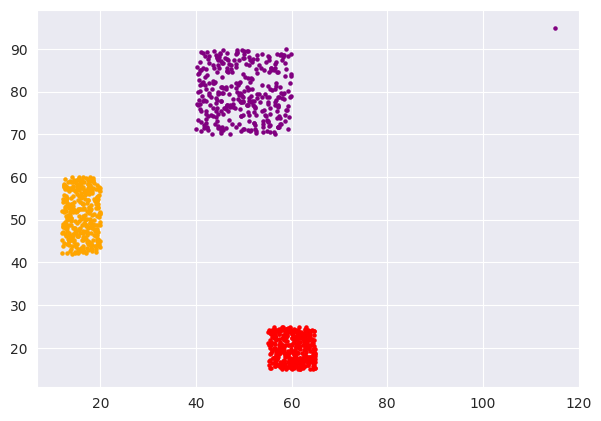

In [14]:
plt.figure(figsize=(7,5))
for index, point in enumerate(clusters[0]):
        plt.scatter(point[0],point[1], marker='o', c='orange', s=5)
for index, point in enumerate(clusters[1]):
        plt.scatter(point[0],point[1], marker='o', c='purple', s=5)
for index, point in enumerate(clusters[2]):
        plt.scatter(point[0],point[1], marker='o', c='red', s=5)    

In [0]:
trials = 20
cost = np.zeros(trials)
cluster_points_trials = []
for _ in range(trials):
    cluster_points = init_kmeans_plus_plus(data_set, 3)
    cluster_points_trials.append(cluster_points)
    cluster_distance = np.full(len(data_set), np.inf)
    for point_idx, point in enumerate(data_set):
        for cluster_idx, cluster_point in enumerate(cluster_points):
            if cluster_distance[point_idx] is math.inf:
                cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
                continue
            if distance.euclidean(point,cluster_point) < cluster_distance[point_idx]:
                cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
    cost[_] = (math.sqrt(np.sum(cluster_distance**2, axis=0) /len(data_set)))
print('3-means costs for  trials= ', trials,' is cost= ', cost)
print('centroids trials= ', trials, ' is centers =',np.array(cluster_points_trials).tolist())

3-means costs for  trials=  20  is cost=  [ 9.43658  9.04801 29.64258  9.83396  7.83159 31.95149  9.6438  31.83162
 29.56669  9.59884  9.522   29.37196 10.81921 29.69235  9.16522  8.95182
 29.61109 29.55782  9.36048 29.64256]
centroids trials=  20  is centers = [[[13.513729853983081, 45.033556411507824], [59.988874023477905, 22.274462216197847], [52.52590218071763, 70.73577721729384]], [[13.513729853983081, 45.033556411507824], [61.20574620043293, 22.735533528863808], [57.224897235758746, 76.73661216871683]], [[13.513729853983081, 45.033556411507824], [56.637296105355205, 18.29141651486513], [62.99100540430472, 17.281050233393078]], [[13.513729853983081, 45.033556411507824], [58.552091338498656, 74.50270456589206], [63.44553840817501, 17.8417449361255]], [[13.513729853983081, 45.033556411507824], [51.023921789061184, 78.58377515596645], [57.54558124438772, 21.16783392989684]], [[13.513729853983081, 45.033556411507824], [58.658466123311186, 73.1758589900369], [55.12623467284194, 73.0549

In [0]:
y = []
i=0
totalFrac = 1/trials
cost = sorted(cost)
for z in range(len(cost)):
    y.append(cost.index(cost[z])*totalFrac)
    if math.fabs(cost[z] - 29.59) < 0.1:
        i = i +1
print('Close 3-means compared to Gonzalez:',i)

Close 3-means compared to Gonzalez: 5


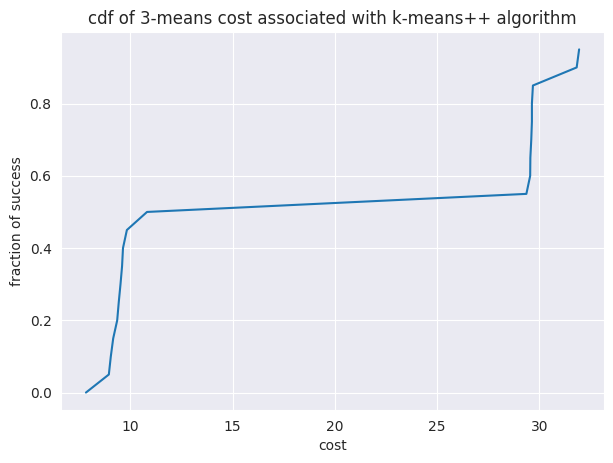

In [0]:
plt.figure(figsize=(7,5), dpi=100)
plt.title("cdf of 3-means cost associated with k-means++ algorithm")
plt.xlabel("cost")
plt.ylabel("fraction of success")
#plt.xlim([np.min(cost),np.max(cost)])
#plt.ylim([0.00,1.05])
plt.plot(np.array(cost), np.array(y))
plt.show()

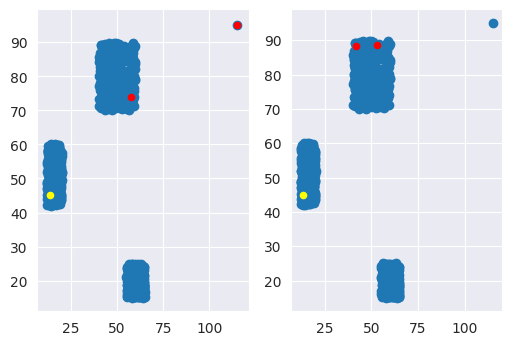

In [0]:
from matplotlib import pyplot
pyplot.figure()

# sp1
cluster_points = init_kmeans_plus_plus(data_set, 3)
pyplot.subplot(121)
pyplot.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        pyplot.scatter(point[0],point[1], marker='o', c='red', s=20)
    if index is 0: # this is our ifrst point, which was picked staticly
        pyplot.scatter(point[0],point[1], marker='o', c='yellow', s=20)

# sp2
cluster_points = init_kmeans_plus_plus(data_set, 3)
pyplot.subplot(122)
pyplot.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        pyplot.scatter(point[0],point[1], marker='o', c='red', s=20)
    if index is 0: # this is our ifrst point, which was picked staticly
        pyplot.scatter(point[0],point[1], marker='o', c='yellow', s=20)

pyplot.show()